# Analysis for How Yearly Salaries vary across Different Data Science Roles based on Educational Levels?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import warnings
from scipy.stats import f_oneway, kruskal
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data_df = pd.read_csv('/Users/tinglu/Desktop/stack-overflow-survey/final_data.csv')
data_df.head()

,Age,EdLevel,YearsCodePro,DevType,CompanySize,Salary_USD
0,18-35 years old,Master,2,DS/MLE,Small(1-99),42480.0
1,18-35 years old,Bachelor,5,DS/MLE,Large(>1000),130000.0
2,18-35 years old,Master,2,DE/DA/BA,Large(>1000),28320.0
3,>35 years old,Doctoral(PhD),8,DS/MLE,Medium(100-999),158000.0
4,18-35 years old,Doctoral(PhD),1,DS/MLE,Small(1-99),100000.0


In [4]:
data_df['EdLevel'].value_counts()

Master           3260
Bachelor         3187
Doctoral(PhD)     771
Name: EdLevel, dtype: int64

In [5]:
data_df['DevType'].value_counts()

DE/DA/BA    3908
DS/MLE      3310
Name: DevType, dtype: int64

### Show salary distribution by education level across all age groups using density plot

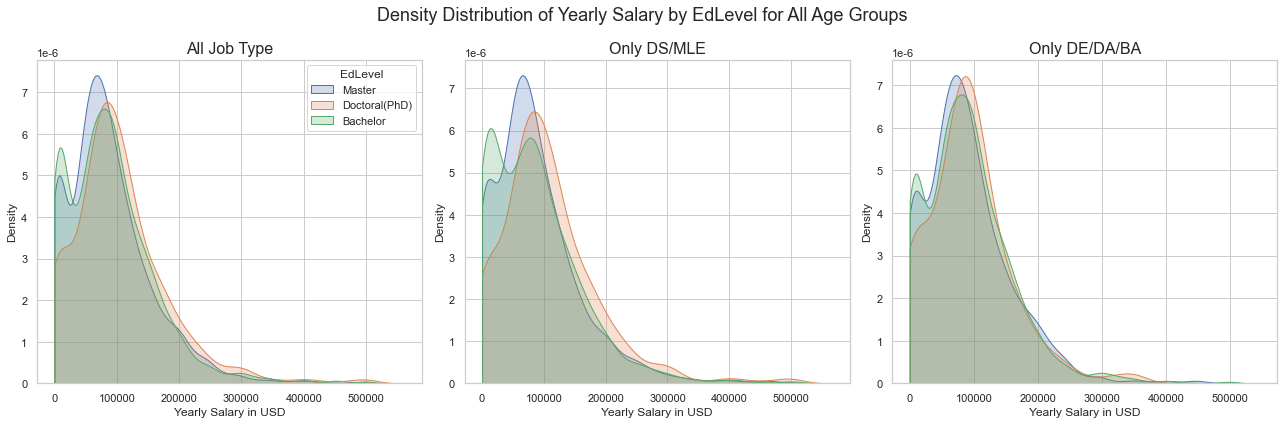

In [6]:
# Set a professional color palette
sns.set_palette("colorblind")
sns.set_theme(style="whitegrid")

# Create the figure and set its facecolor
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.set_facecolor('white')  # Set the background color of the figure

# Custom font settings (adjust font family and size as needed)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12


# First subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') ], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[0])
axes[0].set_xlabel('Yearly Salary in USD')
axes[0].set_ylabel('Density')
axes[0].set_title('All Job Type', fontsize=16)
axes[0].legend(title='EdLevel')


# Second subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[1])
axes[1].set_xlabel('Yearly Salary in USD')
axes[1].set_ylabel('Density')
axes[1].set_title('Only DS/MLE',fontsize=16)

# Third subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[2])
axes[2].set_xlabel('Yearly Salary in USD')
axes[2].set_ylabel('Density')
axes[2].set_title('Only DE/DA/BA',fontsize=16)

fig.suptitle('Density Distribution of Yearly Salary by EdLevel for All Age Groups', fontsize=18)
plt.tight_layout()
plt.show()

### ANOVA test for different education levels across all age groups

In [22]:
# Perform tests and store results
results = []

def run_anova_test(data, ed_level, dev_type):
    """
    Run ANOVA test on compensation data for a specific education level and developer type.

    Args:
        data (DataFrame): The DataFrame containing the data.
        ed_level (str): The education level to filter.
        dev_type (str): The developer type to filter.

    Returns:
        Series: Compensation data for the specified education level and developer type.
    """
    compensation = data[(data['EdLevel'] == ed_level) & (data['DevType'] == dev_type)]['Salary_USD']
    return compensation

# Test 1
bs_ms_compensation = run_anova_test(data_df, 'Master', 'DS/MLE')
phd_compensation = run_anova_test(data_df, 'Doctoral(PhD)', 'DS/MLE')
other_compensation = run_anova_test(data_df, 'Bachelor', 'DS/MLE')

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DS/MLE', 'ANOVA', round(p_value_anova, 9)))

# Test 2
bs_ms_compensation = run_anova_test(data_df, 'Master', 'DE/DA/BA')
phd_compensation = run_anova_test(data_df, 'Doctoral(PhD)', 'DE/DA/BA')
other_compensation = run_anova_test(data_df, 'Bachelor', 'DE/DA/BA')

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DE/DA/BA', 'ANOVA', round(p_value_anova, 4)))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['EdLevel', 'DevType', 'Test', 'p-value'])

# Display the DataFrame
table = tabulate.tabulate(results_df, headers='keys', tablefmt='pretty')
print(table)


+---+---------+----------+-------+---------+
|   | EdLevel | DevType  | Test  | p-value |
+---+---------+----------+-------+---------+
| 0 | EdLevel |  DS/MLE  | ANOVA |  2e-09  |
| 1 | EdLevel | DE/DA/BA | ANOVA | 0.7621  |
+---+---------+----------+-------+---------+


The yearly wage distributions of DE/DA/BA and DS/MLE are very similar and do not differ very significantly, which seems to contradict the widely held belief that the more technical nature of DS/MLE leads to higher wages.

Across all age groups, those with a Ph.D. in DS/MLE roles consistently earned higher salaries than both bachelor’s and master’s degree holders. This difference was statistically significant according to the ANOVA analysis (p<0.001). However, in DA/DE/BA roles, the ANOVA analysis didn’t show any significant difference (p=0.7621). This is in line with common expectations, as DA/DE/BA positions usually don’t require deep statistical knowledge, which might not fully leverage the expertise of Ph.D. holders.

### Salary Distribution by Education level for Age > 35 years old

In [23]:
data_df = data_df[data_df['Age'] == '>35 years old']

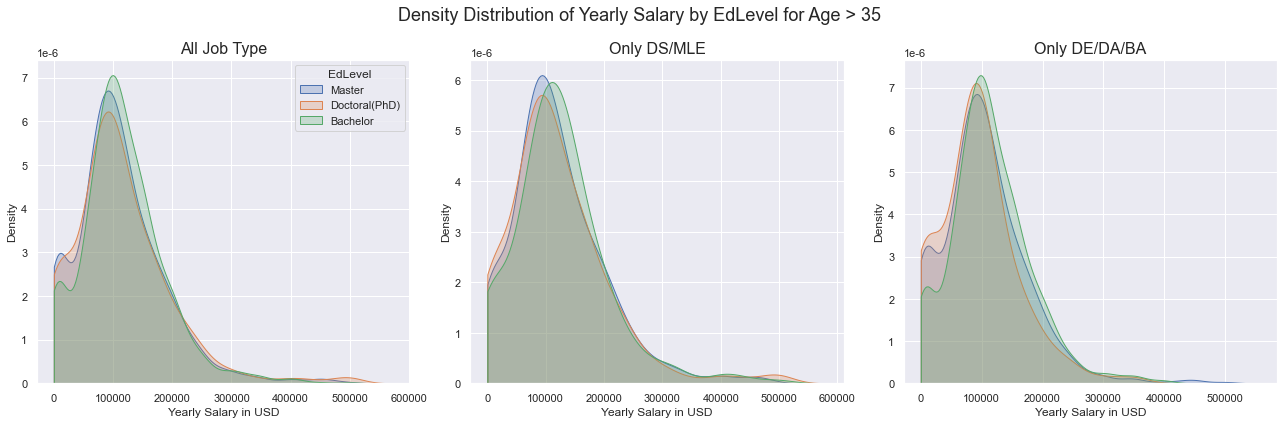

In [24]:
# Set a professional color palette
sns.set_palette("bright")
sns.set_theme(style="darkgrid") 
fig.set_facecolor('white')  # Set the background color of the figure
# Custom font settings (adjust font family and size as needed)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# First subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') ], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[0])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[0])
axes[0].set_xlabel('Yearly Salary in USD')
axes[0].set_ylabel('Density')
axes[0].set_title('All Job Type', fontsize=16)
axes[0].legend(title='EdLevel')


# Second subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[1])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DS/MLE')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[1])
axes[1].set_xlabel('Yearly Salary in USD')
axes[1].set_ylabel('Density')
axes[1].set_title('Only DS/MLE',fontsize=16)

# Third subplot
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Master') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Master', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Doctoral(PhD)') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Doctoral(PhD)', fill=True, clip=(0,None), ax=axes[2])
sns.kdeplot(data=data_df[(data_df['EdLevel'] == 'Bachelor') & (data_df['DevType'] == 'DE/DA/BA')], x='Salary_USD', label='Bachelor', fill=True, clip=(0,None), ax=axes[2])
axes[2].set_xlabel('Yearly Salary in USD')
axes[2].set_ylabel('Density')
axes[2].set_title('Only DE/DA/BA',fontsize=16)

fig.suptitle('Density Distribution of Yearly Salary by EdLevel for Age > 35 ', fontsize=18)
plt.tight_layout()
plt.show()

### ANOVA test for different education levels for age>35 groups

In [26]:
# Perform tests and store results
results = []

def run_anova_test(data, ed_level, dev_type):
    """
    Run ANOVA test on compensation data for a specific education level and developer type.

    Args:
        data (DataFrame): The DataFrame containing the data.
        ed_level (str): The education level to filter.
        dev_type (str): The developer type to filter.

    Returns:
        Series: Compensation data for the specified education level and developer type.
    """
    compensation = data[(data['EdLevel'] == ed_level) & (data['DevType'] == dev_type)]['Salary_USD']
    return compensation

# Test 1
bs_ms_compensation = run_anova_test(data_df, 'Master', 'DS/MLE')
phd_compensation = run_anova_test(data_df, 'Doctoral(PhD)', 'DS/MLE')
other_compensation = run_anova_test(data_df, 'Bachelor', 'DS/MLE')

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DS/MLE', 'ANOVA', round(p_value_anova, 9)))

# Test 2
bs_ms_compensation = run_anova_test(data_df, 'Master', 'DE/DA/BA')
phd_compensation = run_anova_test(data_df, 'Doctoral(PhD)', 'DE/DA/BA')
other_compensation = run_anova_test(data_df, 'Bachelor', 'DE/DA/BA')

f_statistic, p_value_anova = f_oneway(bs_ms_compensation, phd_compensation, other_compensation)

results.append(('EdLevel', 'DE/DA/BA', 'ANOVA', round(p_value_anova, 4)))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['EdLevel', 'DevType', 'Test', 'p-value'])

# Display the DataFrame
table = tabulate.tabulate(results_df, headers='keys', tablefmt='pretty')
print(table)

+---+---------+----------+-------+-------------+
|   | EdLevel | DevType  | Test  |   p-value   |
+---+---------+----------+-------+-------------+
| 0 | EdLevel |  DS/MLE  | ANOVA | 0.752607807 |
| 1 | EdLevel | DE/DA/BA | ANOVA |    0.002    |
+---+---------+----------+-------+-------------+


Within the subgroup aged over 35, possessing a Ph.D. didn’t result in significant differences for DS/MLE positions. The ANOVA analysis showed no significance (p=0.7526). Age adds an intriguing layer. According to my personal intuition, at the early career stage (18–35 years old), a higher education level often translates to higher earnings. However, with 5–10 years of experience in a relevant Data Science field, education level seems to lose its pronounced correlation with salary. This implies that during this phase, industry expertise takes precedence as the primary determinant of income levels.